# Problema
_(Fonte: Linear Algebra and Its Applications. Addison-Wesley Longman, 1997)_

Suponha que um conjunto de dados experimentais seja representado por um conjunto de pontos do plano.
Um polinômio interpolador para esse conjunto de dados é um polinômio cujo gráfico passa por cada ponto.
Em trabalhos científicos, esse polinômio pode ser usado, por exemplo, para obter estimativas de valores
entre pontos conhecidos.

Em uma experiência num túnel de vento, a força sobre um projétil devido à resistência do ar foi medida
para velocidades diferentes:

| Velocidade | Força |
| -- | --  | 
| 0 | 0 |
| 2 | 2.9 |
| 4 | 14.8 |
| 6 | 39.6 |
| 8 | 74.3 |
| 10 | 119 | 

1. Determine um polinômio interpolador para esse conjunto de dados e obtenha uma estimativa para a força
sobre o projétil quando ele está se deslocando a uma velocidade de 228,6 m/s. Use $p(t) = a_0 + a_1t + a_2t^2 + a_3t^3 + a_4t^4 + a_5t^5 $

2. O que acontece se tentarmos obter a resposta empregando um polinômio cúbico, por exemplo.

# Solução

## Polinômios de Lagrange

Um polinômio de Lagrange é um polinômio de interpolação de um conjunto de pontos definido por:

$$ L_i(x) = \prod^n_{j=0, \ j \neq i} \frac{x-x_j}{x_i - x_j} $$

$$ L(x) = \sum^n_{i=0} L_i(x) y_i $$

Definindo $L_i(x)$ para cada ponto, obtemos:

$$ \begin{align*}
L_0(x) &= \Bigl( \frac{x-2}{0 - 2} \Bigr) \Bigl( \frac{x-4}{0-4} \Bigr) \Bigl( \frac{x-6}{0-6} \Bigr) \Bigl( \frac{x-8}{0-8} \Bigr)
\Bigl( \frac{x-10}{0-10} \Bigr) \\
\\
L_1(x) &= \Bigl( \frac{x-0}{2-0} \Bigr) \Bigl( \frac{x-4}{2-4} \Bigr) \Bigl( \frac{x-6}{2-6} \Bigr) \Bigl( \frac{x-8}{2-8} \Bigr)
\Bigl( \frac{x-10}{2-10} \Bigl) \\
\\
L_2(x) &= \Bigl( \frac{x-0}{4-0} \Bigr) \Bigl( \frac{x-2}{4-2} \Bigr) \Bigl( \frac{x-6}{4-6} \Bigr) \Bigl( \frac{x-8}{4-8} \Bigr)
\Bigl( \frac{x-10}{4-10} \Bigr) \\
\\
L_3(x) &= \Bigl( \frac{x-0}{6-0} \Bigr) \Bigl( \frac{x-2}{6-2} \Bigr) \Bigl( \frac{x-4}{6-4} \Bigr) \Bigl( \frac{x-8}{6-8} \Bigr)
\Bigl( \frac{x-10}{6-10} \Bigr) \\
\\
L_4(x) &= \Bigl( \frac{x-0}{8-0} \Bigr) \Bigl( \frac{x-2}{8-2} \Bigl) \Bigl( \frac{x-4}{8-4} \Bigl) \Bigl( \frac{x-6}{8-6} \Bigr)
\Bigl( \frac{x-10}{8-10} \Bigr) \\
\\
L_5(x) &= \Bigl( \frac{x-0}{10-0} \Bigr) \Bigl( \frac{x-2}{10-2} \Bigr) \Bigl( \frac{x-4}{10-4} \Bigr) \Bigl( \frac{x-6}{10-6} \Bigr)
\Bigl( \frac{x-8}{10-8} \Bigr)
\end{align*} $$

O polinômio resultante é então

$$
L(x) = L_0(x) \cdot 0 + L_1(x) \cdot 2.9 + L_2(x) \cdot 14.8 + L_3(x) \cdot 39.6 + L_4(x) \cdot 74.3 + L_5(x) \cdot 119
$$

## Implementação 

In [8]:
import numpy as np   

x = np.array([0, 2, 4, 6, 8, 10])
y = np.array([0, 2.9, 14.8, 39.6, 74.3, 119])

In [9]:
def p(v, x, y):
    """
    Implementação vetorizada dos polinômios de Lagrange.
    """
    return [ np.sum([
        np.product([(t-x[j])/(x[i]-x[j]) for j in range(len(x)) if j!=i ])
        *
        y[i]
    for i in range(len(x))]) for t in v] 

# Verificando valor do polinômio nos pontos pré-estabelecidos
display(p(x, x, y))
display(y)

# Estimativa da força quando t = 228.6
display(p([228.6], x, y)[0])

# Estimativa da força quando t = 228.6 para um polinômio cúbico.
display(p([228.6], x[:-2], y[:-2])[0])

[0.0, 2.9, 14.8, 39.6, 74.3, 119.0]

array([  0. ,   2.9,  14.8,  39.6,  74.3, 119. ])

1442270569.2499504

1003906.4440499991

## Visualização do Polinômio

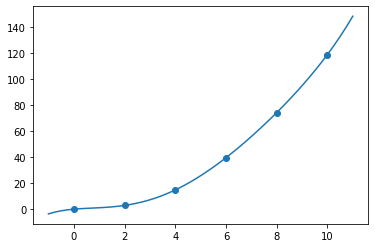

In [129]:
import matplotlib.pyplot as plt

def plot_polinomio(x, y, f, b=(-1.0, 1.0)):
    spc = np.linspace(np.min(x)+b[0], np.max(x)+b[1])
    plt.scatter(x,y)
    plt.plot(spc, f(spc, x, y))

# Visualização do polinômio gerado
plot_polinomio(x, y, p)

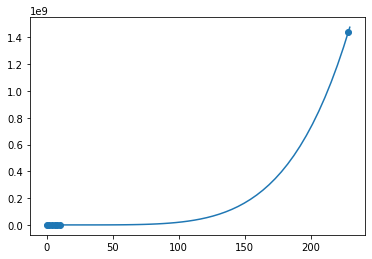

In [130]:
ub = len(x)
plot_polinomio(np.concatenate([x[:ub],[228.6]]), np.concatenate([y[:ub],[p([228.6], x[:ub], y[:ub])][0]]), p)

## Polinômio de Newton


$$

N(x) = [y_0] + [y_0, y_1](x-x_0) + \dots + [y_0, \dots, y_k](x-x_0)(x-x_1) \dots (x-x_{k-1})
$$

In [108]:
def diferenca_dividida(x, y):
    if len(y) == 1:
        return y[0]
    return (diferenca_dividida(x[1:], y[1:])-diferenca_dividida(x[:-1], y[:-1]))/(x[-1]-x[0])

diferenca_dividida([1, 4, 5], [3, 8, 9])

-0.16666666666666669

In [123]:
def polinomio_de_newton(t, x, y):
    return [ np.sum([
        diferenca_dividida(x[:i], y[:i])*np.prod([tt-x[j] for j in range(i-1)]) for i in range(1, len(x)+1)
    ]) for tt in t ]

In [140]:
polinomio_de_newton([228.6], x, y)

[1442270569.249927]

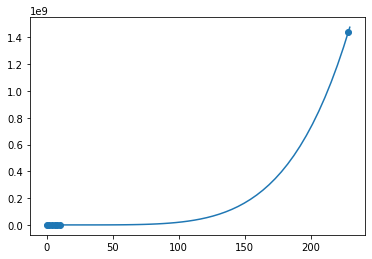

In [142]:
ub = len(x)
plot_polinomio(np.concatenate([x[:ub],[228.6]]), np.concatenate([y[:ub],[polinomio_de_newton([228.6], x[:ub], y[:ub])][0]]), polinomio_de_newton)